# Image Processing with Python: Image Enhancements using Fourier Transform
by: Jephraim C. Manansala | Published on https://jephraim-manansala.medium.com/

### How to remove unnecessary objects or artifacts in images?

In this post, we will be exploring how Fourier Transform Representation can be used to clean images from unnecessary objects and artifacts.

Let’s begin.

As usual, we import libraries such as `numpy`, and `matplotlib`. Additionally, we import specific functions from the `skimage` library. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray

Let us use an image of a cargo ship that I took when I was in Manila Bay Roxas Boulevard Baywalk. For starters, we will convert the image into grayscale by using the `rgb2gray` function from the `skimage` library for ease in coding.

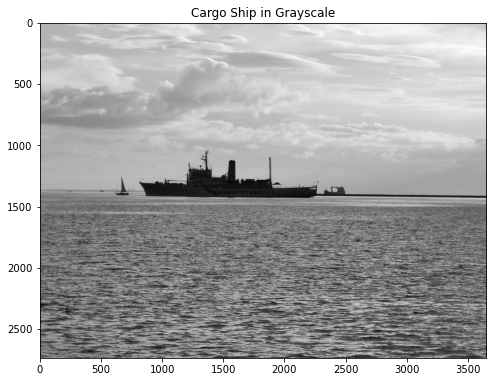

In [2]:
cargoship_rgb = imread('manila-bay.jpg')
cargoship_gray = rgb2gray(cargoship_rgb)

plt.figure(figsize=(8,8))
plt.imshow(cargoship_gray, cmap='gray')
plt.title('Cargo Ship in Grayscale');

Notice that there is a breakwater on the right side of the horizon of the image. Let’s try to remove that using Fourier Transform. To do this, we need to get the Fourier Transform Representation of the image.

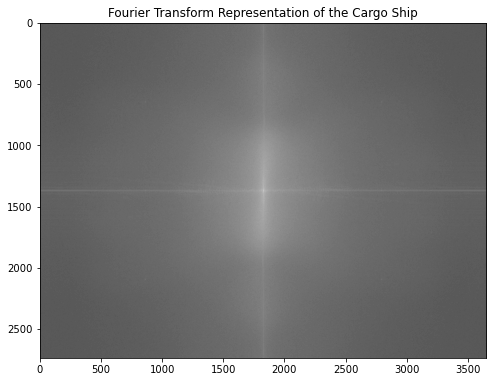

In [3]:
cargoship_fft = np.fft.fftshift(np.fft.fft2(cargoship_gray))
plt.figure(figsize=(8,8))
plt.imshow(np.log(abs(cargoship_fft)), cmap='gray');
plt.title('Fourier Transform Representation of the Cargo Ship');

From the Fourier Transform Representation, we can see a central white speck in the image. This central speck is the DC component of the image, which gives the information of the color intensity of the image. If this central speck is altered, it can drastically change the image altogether. Note that there can be smaller white specks in the Fourier Transform Representation on some images — this pertains to the noise in the image.

To mask the breakwater in the cargo ship image, we need to mask the white lines from the central speck. If there are smaller white specks, we also need to mask those.

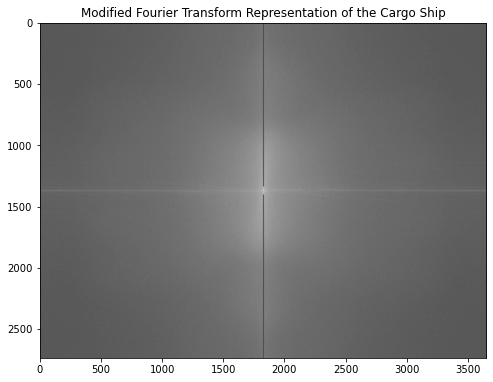

In [4]:
cargoship_fft[:1335, 1820:1828] = 1
cargoship_fft[-1335:,1820:1828] = 1
plt.figure(figsize=(8,8))
plt.imshow(np.log(abs(cargoship_fft)), cmap='gray');
plt.title('Modified Fourier Transform Representation of the Cargo Ship');

To remove the white lines on the image, we can suppress the vertical line by replacing it with a small value *(in this case, the value is 1)*. After which, we can transform the modified Fourier Transform Representation image back to the spatial domain.

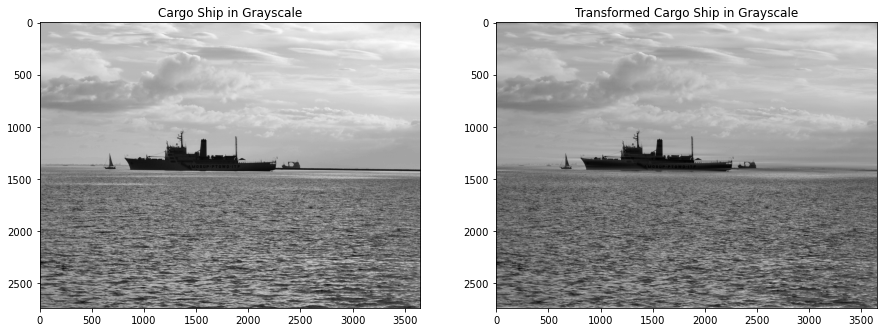

In [5]:
fig, ax = plt.subplots(1,2,figsize=(15,15))

ax[0].imshow(cargoship_gray, cmap='gray')
ax[0].set_title('Cargo Ship in Grayscale');

ax[1].imshow(abs(np.fft.ifft2(cargoship_fft)), cmap='gray');
ax[1].set_title('Transformed Cargo Ship in Grayscale');

By comparing the original image to the transformed image, we can see that the image’s unnecessary artifacts and objects *(in this case, the breakwater)* were successfully removed. Moreover, we can notice that the waves on the right side of the image are also removed because the waves are also horizontal.


Now, you might be wondering what will happen if we suppressed the horizontal white lines in the Fourier Transform Representation rather than the vertical ones. Let’s try that.

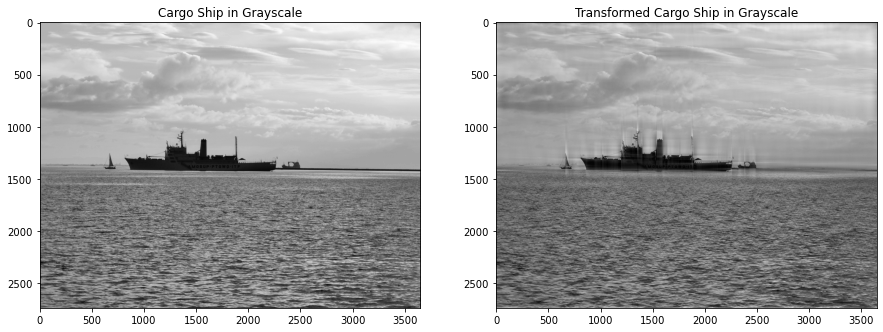

In [6]:
fig, ax = plt.subplots(1,2,figsize=(15,15))

cargoship_fft[1360:1375, :1800] = 1
cargoship_fft[1360:1375, -1800:] = 1

ax[0].imshow(cargoship_gray, cmap='gray')
ax[0].set_title('Cargo Ship in Grayscale');

ax[1].imshow(abs(np.fft.ifft2(cargoship_fft)), cmap='gray');
ax[1].set_title('Transformed Cargo Ship in Grayscale');

The alteration of the image’s vertical patterns was evident when we applied a horizontal suppressing line in the Fourier Transform Representation of the image. This example shows how masking the Fourier Transform Representation of the image can smudge away the unnecessary artifacts and objects from the image.

In general, suppressing a vertical line in the Fourier Transform Representation will remove horizontal patterns in the original image, and vice versa.

Now, let us try to implement the same logic in a colored image. To do this, we will be implementing the same code in each of the image channels.

In [7]:
def rgb_transform(cargoship_rgb, channel):
    """Returns the transformed image in the specified channel"""
    rgb_fft = np.fft.fftshift(np.fft.fft2(
                cargoship_rgb[:, :, channel]))
    rgb_fft[:1335, 1820:1828] = 1
    rgb_fft[-1335:,1820:1828] = 1
    rgb = abs(np.fft.ifft2(rgb_fft))
    return rgb.clip(0, 255)

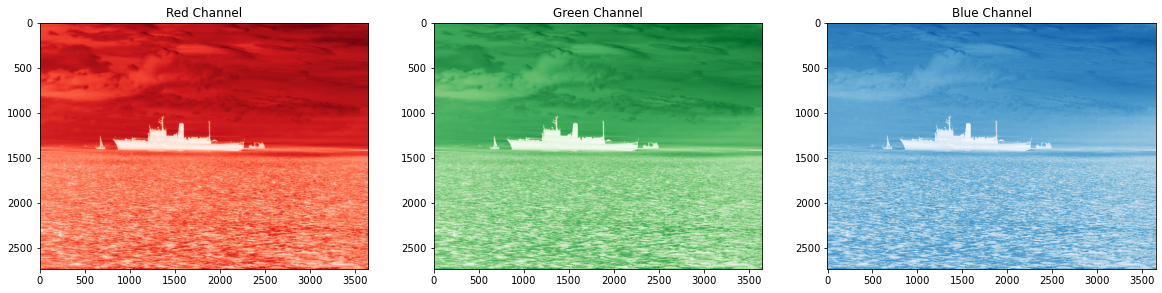

In [8]:
figure, axis = plt.subplots(1,3, figsize=(20,5))


red_channel = rgb_transform(cargoship_rgb, 0)
axis[0].imshow(red_channel, cmap='Reds')
axis[0].set_title('Red Channel')

green_channel = rgb_transform(cargoship_rgb, 1)
axis[1].imshow(green_channel, cmap='Greens')
axis[1].set_title('Green Channel')

blue_channel = rgb_transform(cargoship_rgb, 2)
axis[2].imshow(blue_channel, cmap='Blues')
axis[2].set_title('Blue Channel');

By applying the Fourier Transform Representation on each channel of the image, the horizontal artifacts and patterns have been removed. The only thing remaining is to combine these three channels using the `stack` function.

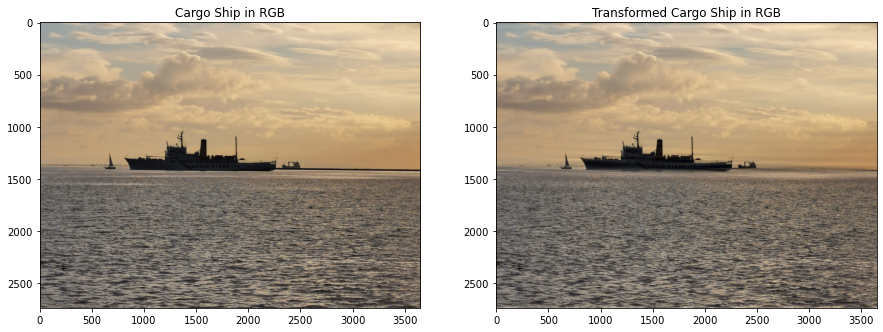

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15,15))
new_image = np.dstack([red_channel.astype(int), 
                       green_channel.astype(int), 
                       blue_channel.astype(int)])

ax[0].imshow(imread('manila-bay.jpg'))
ax[0].set_title('Cargo Ship in RGB');

ax[1].imshow(new_image);
ax[1].set_title('Transformed Cargo Ship in RGB');

The resulting image shows that the Fourier Transform Representation can successfully remove the image’s unnecessary artifacts and patterns. Additionally, aside from removing the said artifacts, the image retained its key features and color shades.

#### In summary

We have explored how artifacts and specific patterns can be removed using Fourier Transform. We should always remember that in modifying the Fourier Transform Representation image, the central speck should always be uncompromised to maintain the image’s key features.

The intuition behind Fourier Transform Representation can be quite challenging to wrap our minds around. However, with continual practice, I believe anyone can get the hang of it!